### In this notebook we use tensorflow CNN model to find waldo.

In [11]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt


In [12]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    '../data/src1/128-gray',
    validation_split=0.2,
    subset="both",
    seed=123,
    image_size=(64, 64),
    batch_size=32)

Found 1344 files belonging to 2 classes.
Using 1076 files for training.
Using 268 files for validation.


In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2)
])



In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=test_ds, epochs=10)

Epoch 1/10


2024-06-08 15:28:03.317810: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1076]
	 [[{{node Placeholder/_4}}]]
2024-06-08 15:28:03.318022: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1076]
	 [[{{node Placeholder/_0}}]]


34/34 [==============================] - 1s 31ms/step - loss: 15.5185 - accuracy: 0.8950 - val_loss: 3.0328 - val_accuracy: 0.9888
Epoch 2/10


2024-06-08 15:28:04.408127: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [268]
	 [[{{node Placeholder/_4}}]]
2024-06-08 15:28:04.408312: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [268]
	 [[{{node Placeholder/_4}}]]


34/34 [==============================] - 1s 28ms/step - loss: 2.2819 - accuracy: 0.9210 - val_loss: 0.7458 - val_accuracy: 0.9888
Epoch 3/10
34/34 [==============================] - 1s 26ms/step - loss: 1.3330 - accuracy: 0.9535 - val_loss: 0.0819 - val_accuracy: 0.9888
Epoch 4/10
34/34 [==============================] - 1s 25ms/step - loss: 0.1525 - accuracy: 0.9786 - val_loss: 0.0683 - val_accuracy: 0.9888
Epoch 5/10
34/34 [==============================] - 1s 25ms/step - loss: 0.0395 - accuracy: 0.9861 - val_loss: 0.0675 - val_accuracy: 0.9925
Epoch 6/10
34/34 [==============================] - 1s 25ms/step - loss: 0.0168 - accuracy: 0.9954 - val_loss: 0.0690 - val_accuracy: 0.9925
Epoch 7/10
34/34 [==============================] - 1s 25ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0838 - val_accuracy: 0.9925
Epoch 8/10
34/34 [==============================] - 1s 26ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0853 - val_accuracy: 0.9925
Epoch 9/10
34/34 [======

9/9 - 0s - loss: 0.0904 - accuracy: 0.9925 - 90ms/epoch - 10ms/step


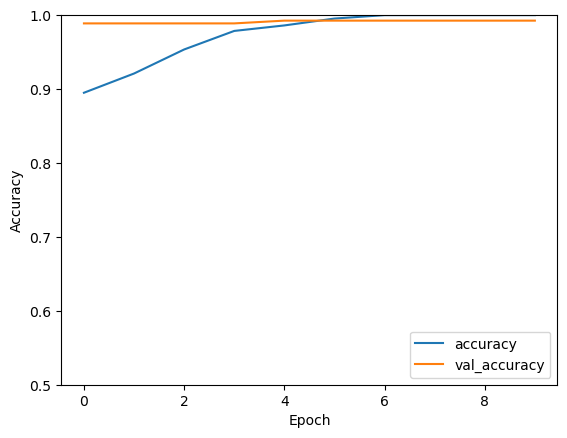

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_ds, verbose=2)